In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
data = pd.read_csv('Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#to display information about the dataet

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.drop('Cabin' , inplace = True ,axis=1)
data['Embarked'] = data['Embarked'].fillna('S')
data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [11]:
#to display the number of rows and columns

data.shape

(891, 11)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


CATEGORICAL FEATURES

In [13]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)
data = pd.concat([data,Sex,Embarked],axis=1)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


DATA VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

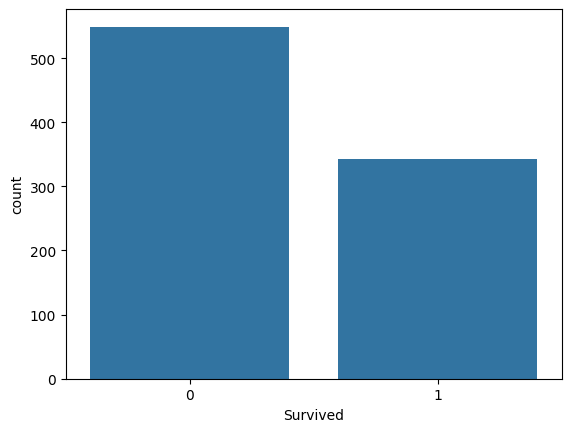

In [34]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

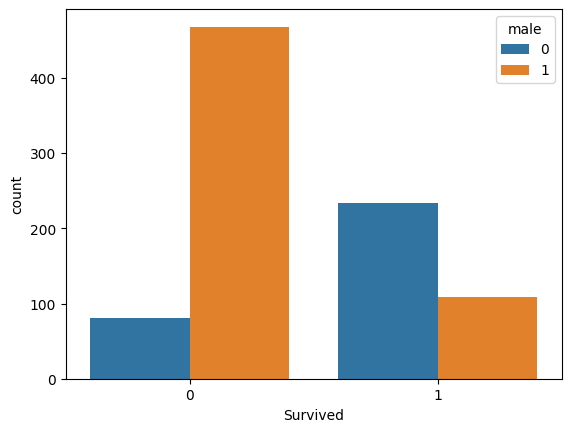

In [16]:
sns.countplot(x='Survived', data=data, hue='male')

<Axes: xlabel='Survived', ylabel='count'>

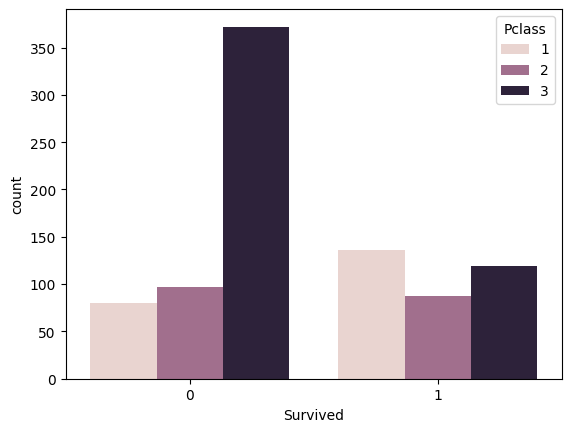

In [17]:
sns.countplot(x='Survived', data=data, hue='Pclass')

<Axes: >

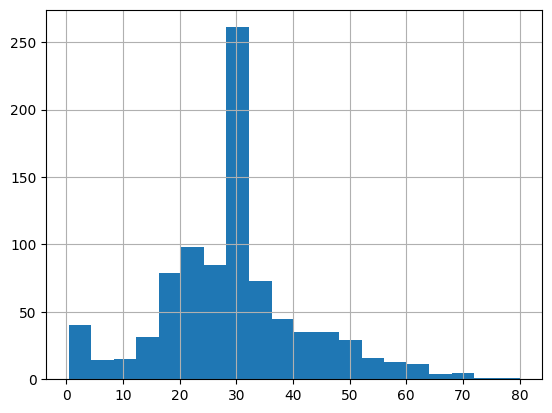

In [19]:
#Histograms

data['Age'].hist(bins=20)


<Axes: >

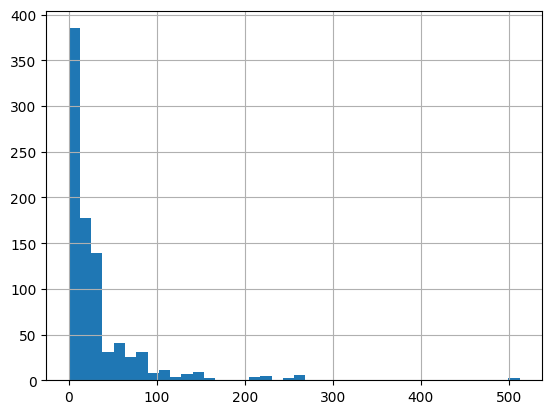

In [20]:
data['Fare'].hist(bins=40)

<Axes: ylabel='Fare'>

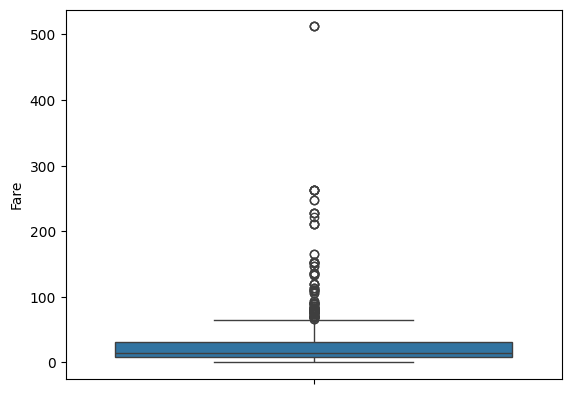

In [21]:
sns.boxplot(y='Fare', data=data)

DATA PREPROCESSING

Text(0, 0.5, 'Frequency')

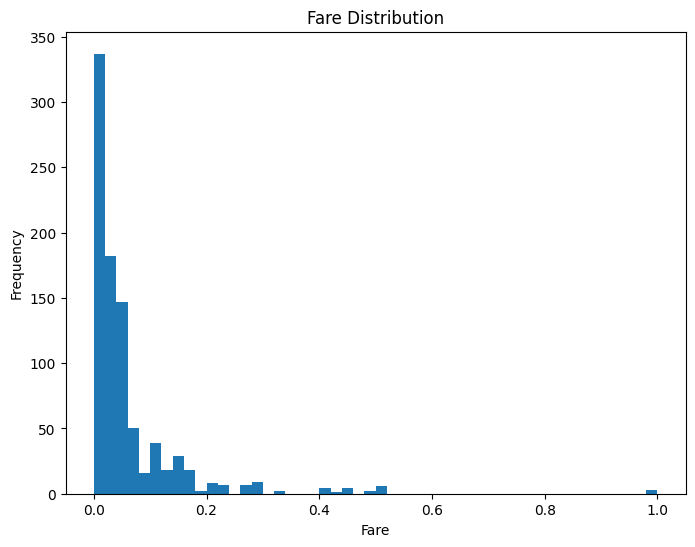

In [23]:
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


MODEL TRAINING

In [26]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = data['Survived']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

DecisionTreeClassifier

In [35]:
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [36]:
y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.48


In [37]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 84.91620111731844
